<h1> Crossentropy loss function! </h1> 

Let's see if this helped. I assume so, as the crossentropy is a common loss for classification problems.

In [1]:
# own skrips
import helperfile5 as hf
# generalls libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import uproot
from tensorflow.keras.optimizers import Adam
import time
import datetime
from scipy.optimize import curve_fit
from matplotlib.colors import LogNorm
from uncertainties import unumpy as unp
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# load data

num_events = 200000

rootfile1 = uproot.open('./stage5_clusters_1gamma.root')
ipd1 = hf.InputData(rootfile1, 1, numevents=num_events)
ipd1.train_test_split()

rootfile2 = uproot.open('./stage5_clusters_2gamma.root')
ipd2 = hf.InputData(rootfile2, 2, numevents=num_events)
ipd2.train_test_split()

rootfile3 = uproot.open('./stage5_clusters_3gamma.root')
ipd3 = hf.InputData(rootfile3, 3, numevents=num_events)
ipd3.train_test_split()

# prep data
trainings_data = np.concatenate((ipd1.num_photons_t-1, ipd2.num_photons_t-1,  ipd3.num_photons_t-1))
training = hf.one_hot(trainings_data)
data_veri = np.concatenate((ipd1.num_photons_v-1, ipd2.num_photons_v-1, ipd3.num_photons_v-1))

clus = np.concatenate((ipd1.shash_t.reshape(len(ipd1.E_truth_train),25, 49, 1), ipd2.shash_t.reshape(len(ipd2.E_truth_train),25, 49, 1), ipd3.shash_t.reshape(len(ipd3.E_truth_train),25, 49, 1)))
clus_v = np.concatenate((ipd1.shash_v.reshape(len(ipd1.E_truth_veri),25, 49, 1), ipd2.shash_v.reshape(len(ipd2.E_truth_veri),25, 49, 1), ipd3.shash_v.reshape(len(ipd3.E_truth_veri),25, 49, 1)))


Loaded data
Formed cluster
Splitted data into training and test set!
Loaded data
Formed cluster
Splitted data into training and test set!
Loaded data
Formed cluster
Splitted data into training and test set!


In [121]:
data_lednev = np.concatenate((ipd1.num_fit_v-1, ipd2.num_fit_v-1, ipd3.num_fit_v-1))

In [3]:
model = keras.models.load_model('./models/model_3photons_crossentropyloss_2023-04-26')

In [4]:
output = model.predict(clus_v)
ev = hf.Evaluation(output) # create object to help with evaluation

We want to investigate the Confusion Matrizes for differnet distances...

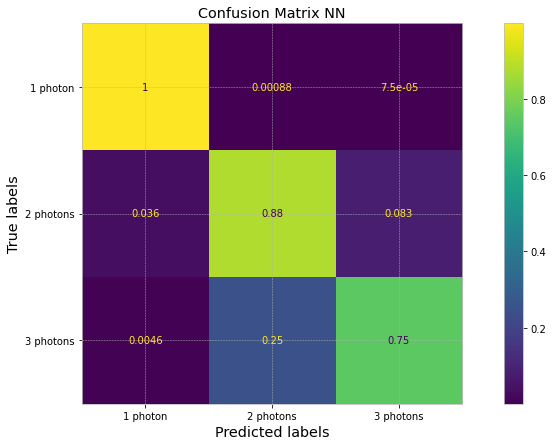

In [5]:
ev.show_confusion_matrix(data_veri, 3, save=False)

Now cut into differnet regions by distance... Not appliable on 1 photon, for 2 it's obvious and for 3 photons we use the minimum distance of all three.

In [11]:
from functools import reduce

In [117]:
def distance(x1, x2, y1, y2):
    return abs(np.sqrt(x1**2 + y1**2) - np.sqrt(x2**2 + y2**2))


In [68]:
def show_confusion_matrix(out, true_label, n, save=False, title=""):
    plt.style.use('standard_style.mplstyle')
    confusion = confusion_matrix(true_label, np.argmax(out, axis=1) , normalize='true')

    fig, ax = plt.subplots(figsize=(15, 7))

    ConfusionMatrixDisplay(confusion).plot(ax=ax)

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels') 
    ax.set_title('Confusion Matrix NN')
    labels = np.arange(n-1) +2
    label = ["1 photon"]  + [str(i) + " photons" for i in labels]
    ax.xaxis.set_ticklabels(label)
    ax.yaxis.set_ticklabels(label)
    if save==True:
        plt.savefig("./bilder/" + title + "_confusion_matrix.pdf")
    plt.show()

In [45]:
ind_good2 = np.where(distance(ipd2.x_truth_veri.T[0], ipd2.x_truth_veri.T[1], ipd2.y_truth_veri.T[0], ipd2.y_truth_veri.T[1])>4)
ind_good2 = ind_good2[0] + 40000

d1_3 = 
ind_good3_1 = np.where(distance(ipd3.x_truth_veri.T[0], ipd3.x_truth_veri.T[1], ipd3.y_truth_veri.T[0], ipd3.y_truth_veri.T[1])>4)
ind_good3_2 = np.where(distance(ipd3.x_truth_veri.T[2], ipd3.x_truth_veri.T[1], ipd3.y_truth_veri.T[2], ipd3.y_truth_veri.T[1])>4)
ind_good3_3 = np.where(distance(ipd3.x_truth_veri.T[0], ipd3.x_truth_veri.T[2], ipd3.y_truth_veri.T[0], ipd3.y_truth_veri.T[2])>4)

ind_good3 = reduce(np.intersect1d, (ind_good3_1, ind_good3_2, ind_good3_3))
ind_good3 = ind_good3 + 2*40000

In [61]:
d3_1 = distance(ipd3.x_truth_veri.T[0], ipd3.x_truth_veri.T[1], ipd3.y_truth_veri.T[0], ipd3.y_truth_veri.T[1])
d3_2 = distance(ipd3.x_truth_veri.T[2], ipd3.x_truth_veri.T[1], ipd3.y_truth_veri.T[2], ipd3.y_truth_veri.T[1])
d3_3 = distance(ipd3.x_truth_veri.T[0], ipd3.x_truth_veri.T[2], ipd3.y_truth_veri.T[0], ipd3.y_truth_veri.T[2])


d3_min = np.amin(np.array([d3_1, d3_2, d3_3]), axis=0)
ind_good3_min = np.where(d3_min>4)
ind_good3_min = ind_good3_min[0] + 2*40000

In [60]:
ind3_min.shape

(945,)

In [47]:
print(ind_good2.shape)
print(ind_good3.shape)

(10877,)
(945,)


In [48]:
print(ipd1.num_photons_v.shape)
print(ipd2.num_photons_v.shape)
print(ipd3.num_photons_v.shape)

(40000,)
(40000,)
(40000,)


In [49]:
ind_oneset = np.arange(40000)

In [62]:
ind2 = np.concatenate((ind_oneset, ind_good2, ind_oneset+2*40000))
ind3 = np.concatenate((ind_oneset, ind_oneset + 40000, ind_good3))
ind3_min = np.concatenate((ind_oneset, ind_oneset + 40000, ind_good3_min))

In [63]:
print(ind3.shape)
print(data_veri.shape)

(80945,)
(120000,)


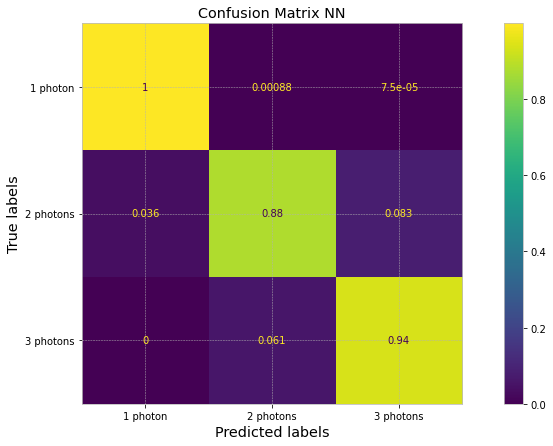

In [64]:
show_confusion_matrix(output[ind3_min], data_veri[ind3_min], 3, save=False)

Ok lets make this nice!

In [125]:
def show_confusion_matrix(out, true_label, n, ax, save=False, title=""):
    confusion = confusion_matrix(true_label, np.argmax(out, axis=1) , normalize='true')
    ConfusionMatrixDisplay(confusion).plot(ax=ax)

    plt.xlabel('Predicted labels')
    plt.ylabel('True labels') 
    labels = np.arange(n-1) +2
    label = ["1 photon"]  + [str(i) + " photons" for i in labels]
    plt.xticks(np.arange(n), label)
    plt.yticks(np.arange(n), label)
    if save==True:
        plt.savefig("./bilder/" + title + "_confusion_matrix.pdf")

In [126]:
def show_confusion_matrix_Lednev(lednev, true_label, n, ax, save=False, title=""):
    confusion = confusion_matrix(true_label, lednev , normalize='true')
    ConfusionMatrixDisplay(confusion).plot(ax=ax)

    plt.xlabel('Predicted labels')
    plt.ylabel('True labels') 
    labels = np.arange(n-1) +2
    label = ["1 photon"]  + [str(i) + " photons" for i in labels]
    plt.xticks(np.arange(n), label)
    plt.yticks(np.arange(n), label)
    if save==True:
        plt.savefig("./bilder/" + title + "_confusion_matrix.pdf")

In [137]:
def ind_3(dist):
    d3_1 = distance(ipd3.x_truth_veri.T[0], ipd3.x_truth_veri.T[1], ipd3.y_truth_veri.T[0], ipd3.y_truth_veri.T[1])
    d3_2 = distance(ipd3.x_truth_veri.T[2], ipd3.x_truth_veri.T[1], ipd3.y_truth_veri.T[2], ipd3.y_truth_veri.T[1])
    d3_3 = distance(ipd3.x_truth_veri.T[0], ipd3.x_truth_veri.T[2], ipd3.y_truth_veri.T[0], ipd3.y_truth_veri.T[2])


    d3_min = np.amin(np.array([d3_1, d3_2, d3_3]), axis=0)
    ind_good3_min = np.where(d3_min>dist)
    return ind_good3_min[0] + 2*40000

def ind_2(dist):
    ind_good2 = np.where(distance(ipd2.x_truth_veri.T[0], ipd2.x_truth_veri.T[1], ipd2.y_truth_veri.T[0], ipd2.y_truth_veri.T[1])>dist)
    return ind_good2[0] + 40000


In [164]:
def sliced_CM(figsize=(15,25)):
    plt.style.use('standard_style.mplstyle')
    fig = plt.figure(figsize=figsize)
    dist = np.arange(6)
    for d in dist:
        # NN:
        ax = fig.add_subplot(len(dist),2, 2*d+1)
        ind = np.concatenate((np.arange(40000), ind_2(d), ind_3(d)))
        print("Number of events (NN): ", d, " cm, ", len(ind), "/", len(data_veri))
        show_confusion_matrix(output[ind], data_veri[ind], 3, ax, save=False)
        plt.title(str(d)+" cm distance (NN)")
        # Lednev:
        ax = fig.add_subplot(len(dist),2, 2*d+2)
        print("Number of events (Lednev): ", d, " cm, ", len(ind), "/", len(data_veri))
        n = 5
        if d>1:
            n=4
        show_confusion_matrix_Lednev(data_lednev[ind], data_veri[ind], n, ax, save=False)
        plt.title(str(d)+" cm distance (Lednev)")
    plt.tight_layout()
    plt.show()

Number of events (NN):  0  cm,  120000 / 120000
Number of events (Lednev):  0  cm,  120000 / 120000
Number of events (NN):  1  cm,  100737 / 120000
Number of events (Lednev):  1  cm,  100737 / 120000
Number of events (NN):  2  cm,  88288 / 120000
Number of events (Lednev):  2  cm,  88288 / 120000
Number of events (NN):  3  cm,  78949 / 120000
Number of events (Lednev):  3  cm,  78949 / 120000
Number of events (NN):  4  cm,  71805 / 120000
Number of events (Lednev):  4  cm,  71805 / 120000
Number of events (NN):  5  cm,  66171 / 120000
Number of events (Lednev):  5  cm,  66171 / 120000


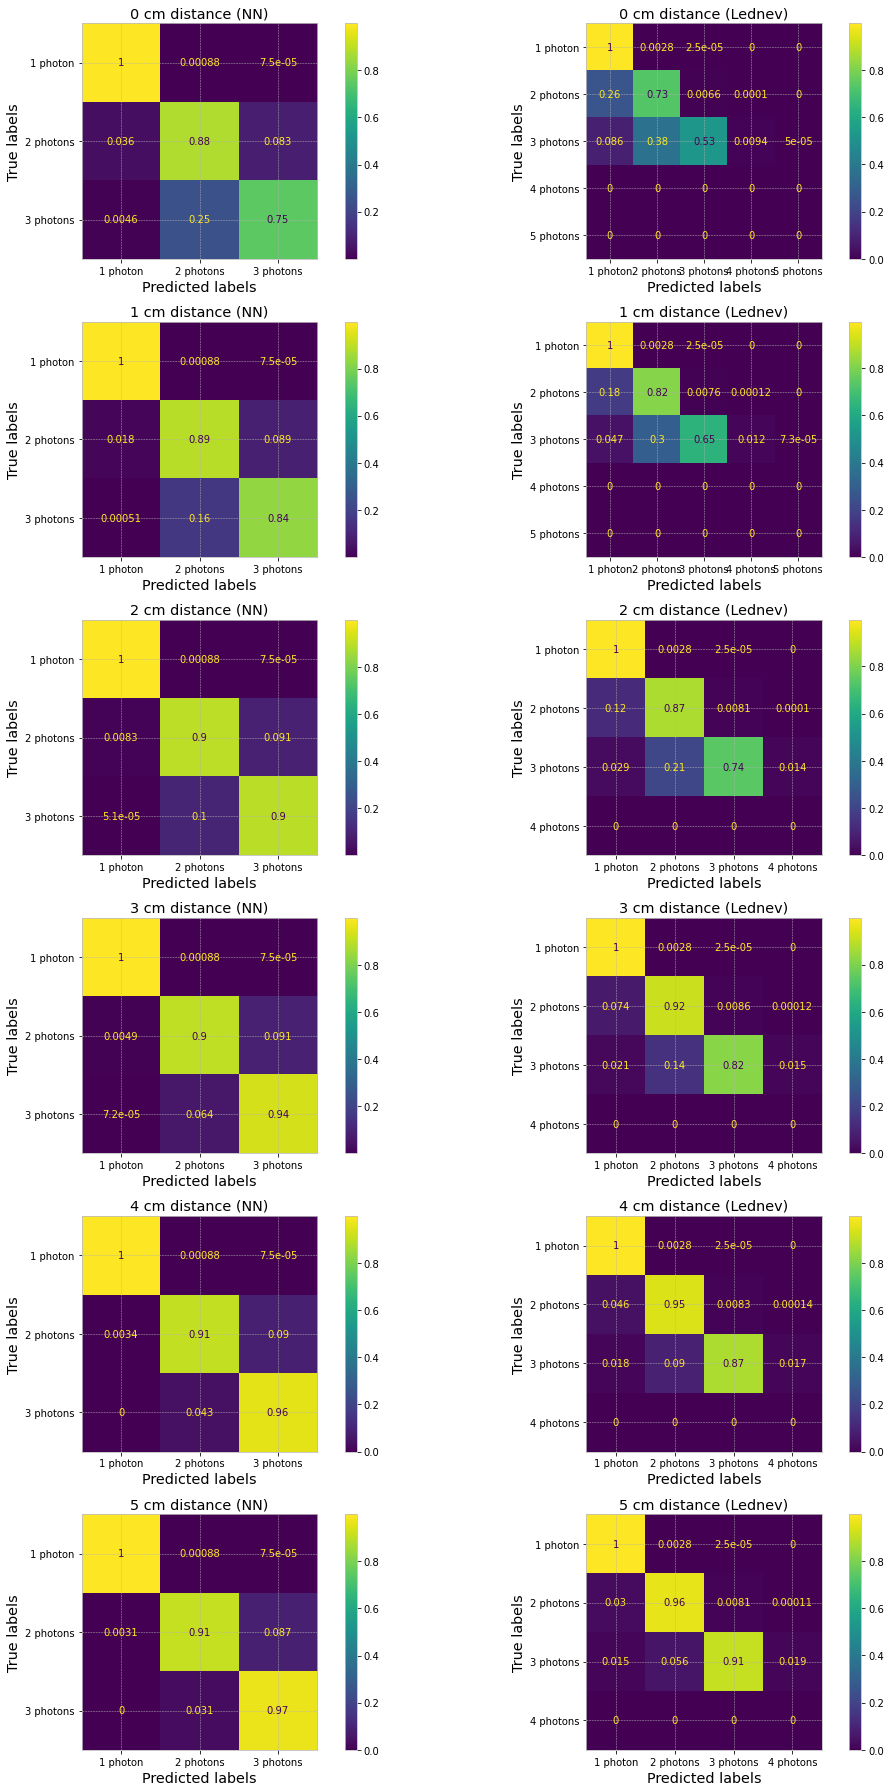

In [165]:
sliced_CM()

Ok wie gut denk das Netz, dass es ist?

In [144]:
ind_1gamma = np.where(data_veri==0)
ind_2gamma = np.where(data_veri==1)
ind_3gamma = np.where(data_veri==2)

In [162]:
def NN_sure(ind_2_gamma, ind_3_gamma, figsize=(15, 25)):
    plt.style.use('standard_style.mplstyle')
    fig = plt.figure(figsize=figsize)
    dist = np.arange(7)
    for d in dist:
        ax = fig.add_subplot(len(dist),2, 2*d+1)
        ind_d = np.concatenate((np.arange(40000), ind_2(d), ind_3(d)))
        ind = np.intersect1d(ind_d, ind_2_gamma)
        plt.hist(output[ind], bins=20, label=['1 photon', '2 photons', '3 photons'])
        plt.xlabel("Probability given by NN")
        plt.ylabel("counts")
        plt.yscale("log")
        plt.title(str(d)+" cm distance (2 photons)")
        plt.legend()
        ax = fig.add_subplot(len(dist),2, 2*d+2)
        ind_d = np.concatenate((np.arange(40000), ind_2(d), ind_3(d)))
        ind = np.intersect1d(ind_d, ind_3_gamma)
        plt.hist(output[ind], bins=20, label=['1 photon', '2 photons', '3 photons'])
        plt.xlabel("Probability given by NN")
        plt.ylabel("counts")
        plt.yscale("log")
        plt.title(str(d)+" cm distance (3 photons)")
        plt.legend()
    plt.tight_layout()
    plt.show()

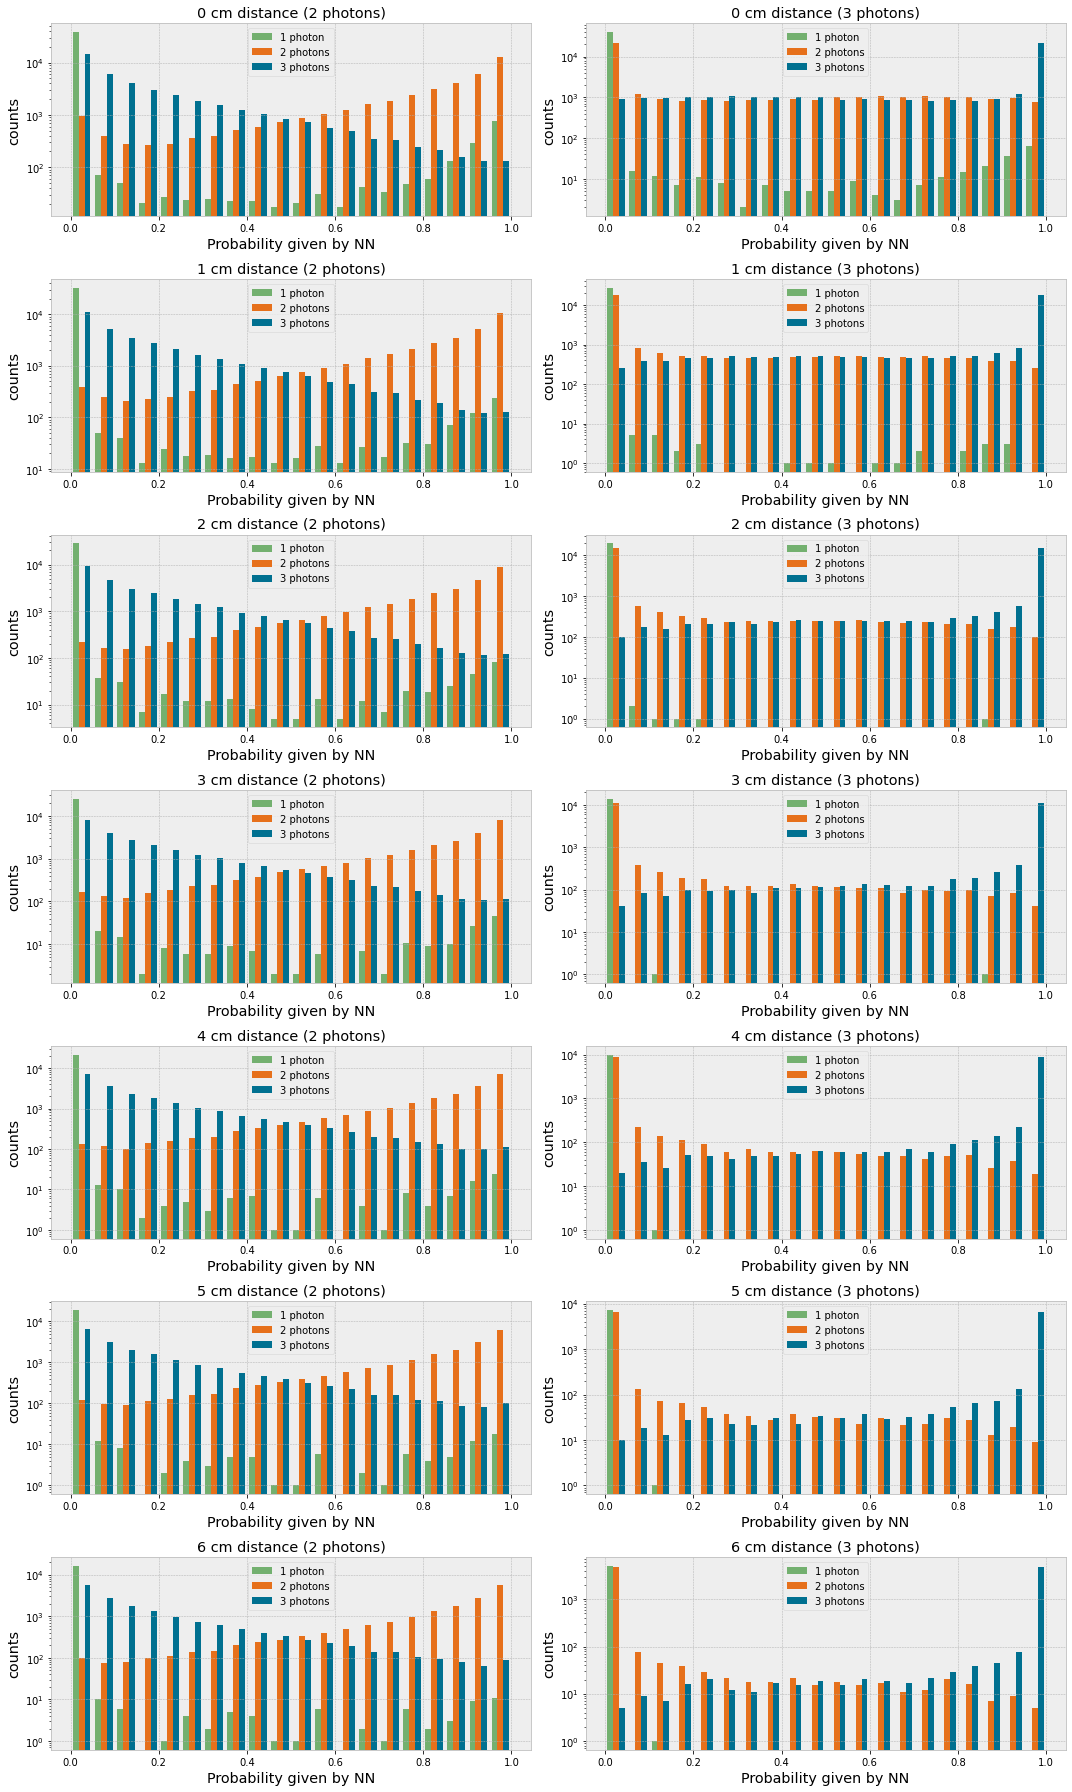

In [163]:
NN_sure(ind_2gamma, ind_3gamma)